In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
quota1 = pd.read_csv('data1/data_quota.csv')
quota2 = pd.read_csv('data2/data_quota.csv')
quota3 = pd.read_csv('data3/data_quota.csv')
quota4 = pd.read_csv('data4/data_quota.csv')
quota5 = pd.read_csv('data5/data_quota.csv')
quota6 = pd.read_csv('data/data_quota.csv')
quota7 = pd.read_csv('data6/data_quota.csv')
quota8 = pd.read_csv('data7/data_quota.csv')
quota9 = pd.read_csv('data8/data_quota.csv')

quota = pd.concat([quota1, quota2, quota3, quota4, quota5, quota6, quota7, quota8, quota9])

In [18]:
parental1 = pd.read_csv('data1/data_shared_parental.csv')
parental2 = pd.read_csv('data2/data_shared_parental.csv')
parental3 = pd.read_csv('data3/data_shared_parental.csv')
parental4 = pd.read_csv('data4/data_shared_parental.csv')
parental5 = pd.read_csv('data5/data_shared_parental.csv')
parental6 = pd.read_csv('data/data_shared_parental.csv')
parental7 = pd.read_csv('data6/data_shared_parental.csv')
parental8 = pd.read_csv('data7/data_shared_parental.csv')
parental9 = pd.read_csv('data8/data_shared_parental.csv')

parental = pd.concat([parental1, parental2, parental3, parental4, parental5, parental6, parental7, parental8, parental9])


In [7]:
blinding1 = pd.read_csv('data1/data_blinding.csv')
blinding2 = pd.read_csv('data2/data_blinding.csv')
blinding3 = pd.read_csv('data3/data_blinding.csv')
blinding4 = pd.read_csv('data4/data_blinding.csv')
blinding5 = pd.read_csv('data5/data_blinding.csv')
blinding6 = pd.read_csv('data/data_blinding.csv')
blinding7 = pd.read_csv('data7/data_blinding.csv')
blinding8 = pd.read_csv('data6/data_blinding.csv')
blinding9 = pd.read_csv('data8/data_blinding.csv')


blinding = pd.concat([blinding1, blinding2, blinding3, blinding4, blinding5, blinding6, blinding7, blinding8, blinding9])



nointervention1 = pd.read_csv('data1/data_no_int.csv')
nointervention2 = pd.read_csv('data2/data_no_int.csv')
nointervention3 = pd.read_csv('data3/data_no_int.csv')
nointervention4 = pd.read_csv('data4/data_no_int.csv')
nointervention5 = pd.read_csv('data5/data_no_int.csv')
nointervention6 = pd.read_csv('data/data_no_int.csv')
nointervention7 = pd.read_csv('data6/data_no_int.csv')
nointervention8 = pd.read_csv('data7/data_no_int.csv')
nointervention9 = pd.read_csv('data8/data_no_int.csv')

nointervention = pd.concat([nointervention1, nointervention2, nointervention3, nointervention4, nointervention5, nointervention6, nointervention7, nointervention8, nointervention9])



In [8]:
validate1 = pd.read_csv('data1/data.csv')
validate2 = pd.read_csv('data2/data.csv')
validate3 = pd.read_csv('data3/data.csv')
validate4 = pd.read_csv('data4/data.csv')
validate5 = pd.read_csv('data5/data.csv')
validate6 = pd.read_csv('data/data.csv')
validate7 = pd.read_csv('data7/data.csv')
validate8 = pd.read_csv('data8/data.csv')
validate9 = pd.read_csv('data6/data.csv')

validate = pd.concat([validate1, validate2, validate3, validate4, validate5, validate6, validate7, validate8, validate9])

# Validating the model from 2016-2021

In [9]:
data_percent_women = {'2017': {'Level 6': 48, 'Level 5': 37, 'Level 4': 33, 'Level 3': 28, 'Level 2': 22, 'Level 1': 21},
             '2018': {'Level 6': 48, 'Level 5': 38, 'Level 4': 34, 'Level 3': 29, 'Level 2': 23, 'Level 1': 22},
             '2019': {'Level 6': 48, 'Level 5': 38, 'Level 4': 35, 'Level 3': 31, 'Level 2': 26, 'Level 1': 22},
             '2020': {'Level 6': 47, 'Level 5': 38, 'Level 4': 33, 'Level 3': 29, 'Level 2': 28, 'Level 1': 21},
             '2021': {'Level 6': 48, 'Level 5': 41, 'Level 4': 35, 'Level 3': 30, 'Level 2': 27, 'Level 1': 24},
             '2022': {'Level 6': 48, 'Level 5': 41, 'Level 4': 36, 'Level 3': 31, 'Level 2': 27, 'Level 1': 24},
             '2023': {'Level 6': 48, 'Level 5': 40, 'Level 4': 37, 'Level 3': 31, 'Level 2': 28, 'Level 1': 28}}

plot_data = pd.DataFrame.from_dict(data_percent_women, orient='index')

results = []

for i in np.unique(validate['tick']):
    for j in np.unique(validate['position']):
        dat = validate[(validate['tick'] == i) & (validate['position'] == j)]
        num_women = dat[dat['gender'] == 'female'].shape[0]
        num_agents = dat.shape[0]
        percent_women = num_women / num_agents * 100 if num_agents > 0 else 0

        results.append({'percent_wom': percent_women, 'tick': i, 'position': j})

# Convert the list of dictionaries to a DataFrame
vali_plot = pd.DataFrame(results)

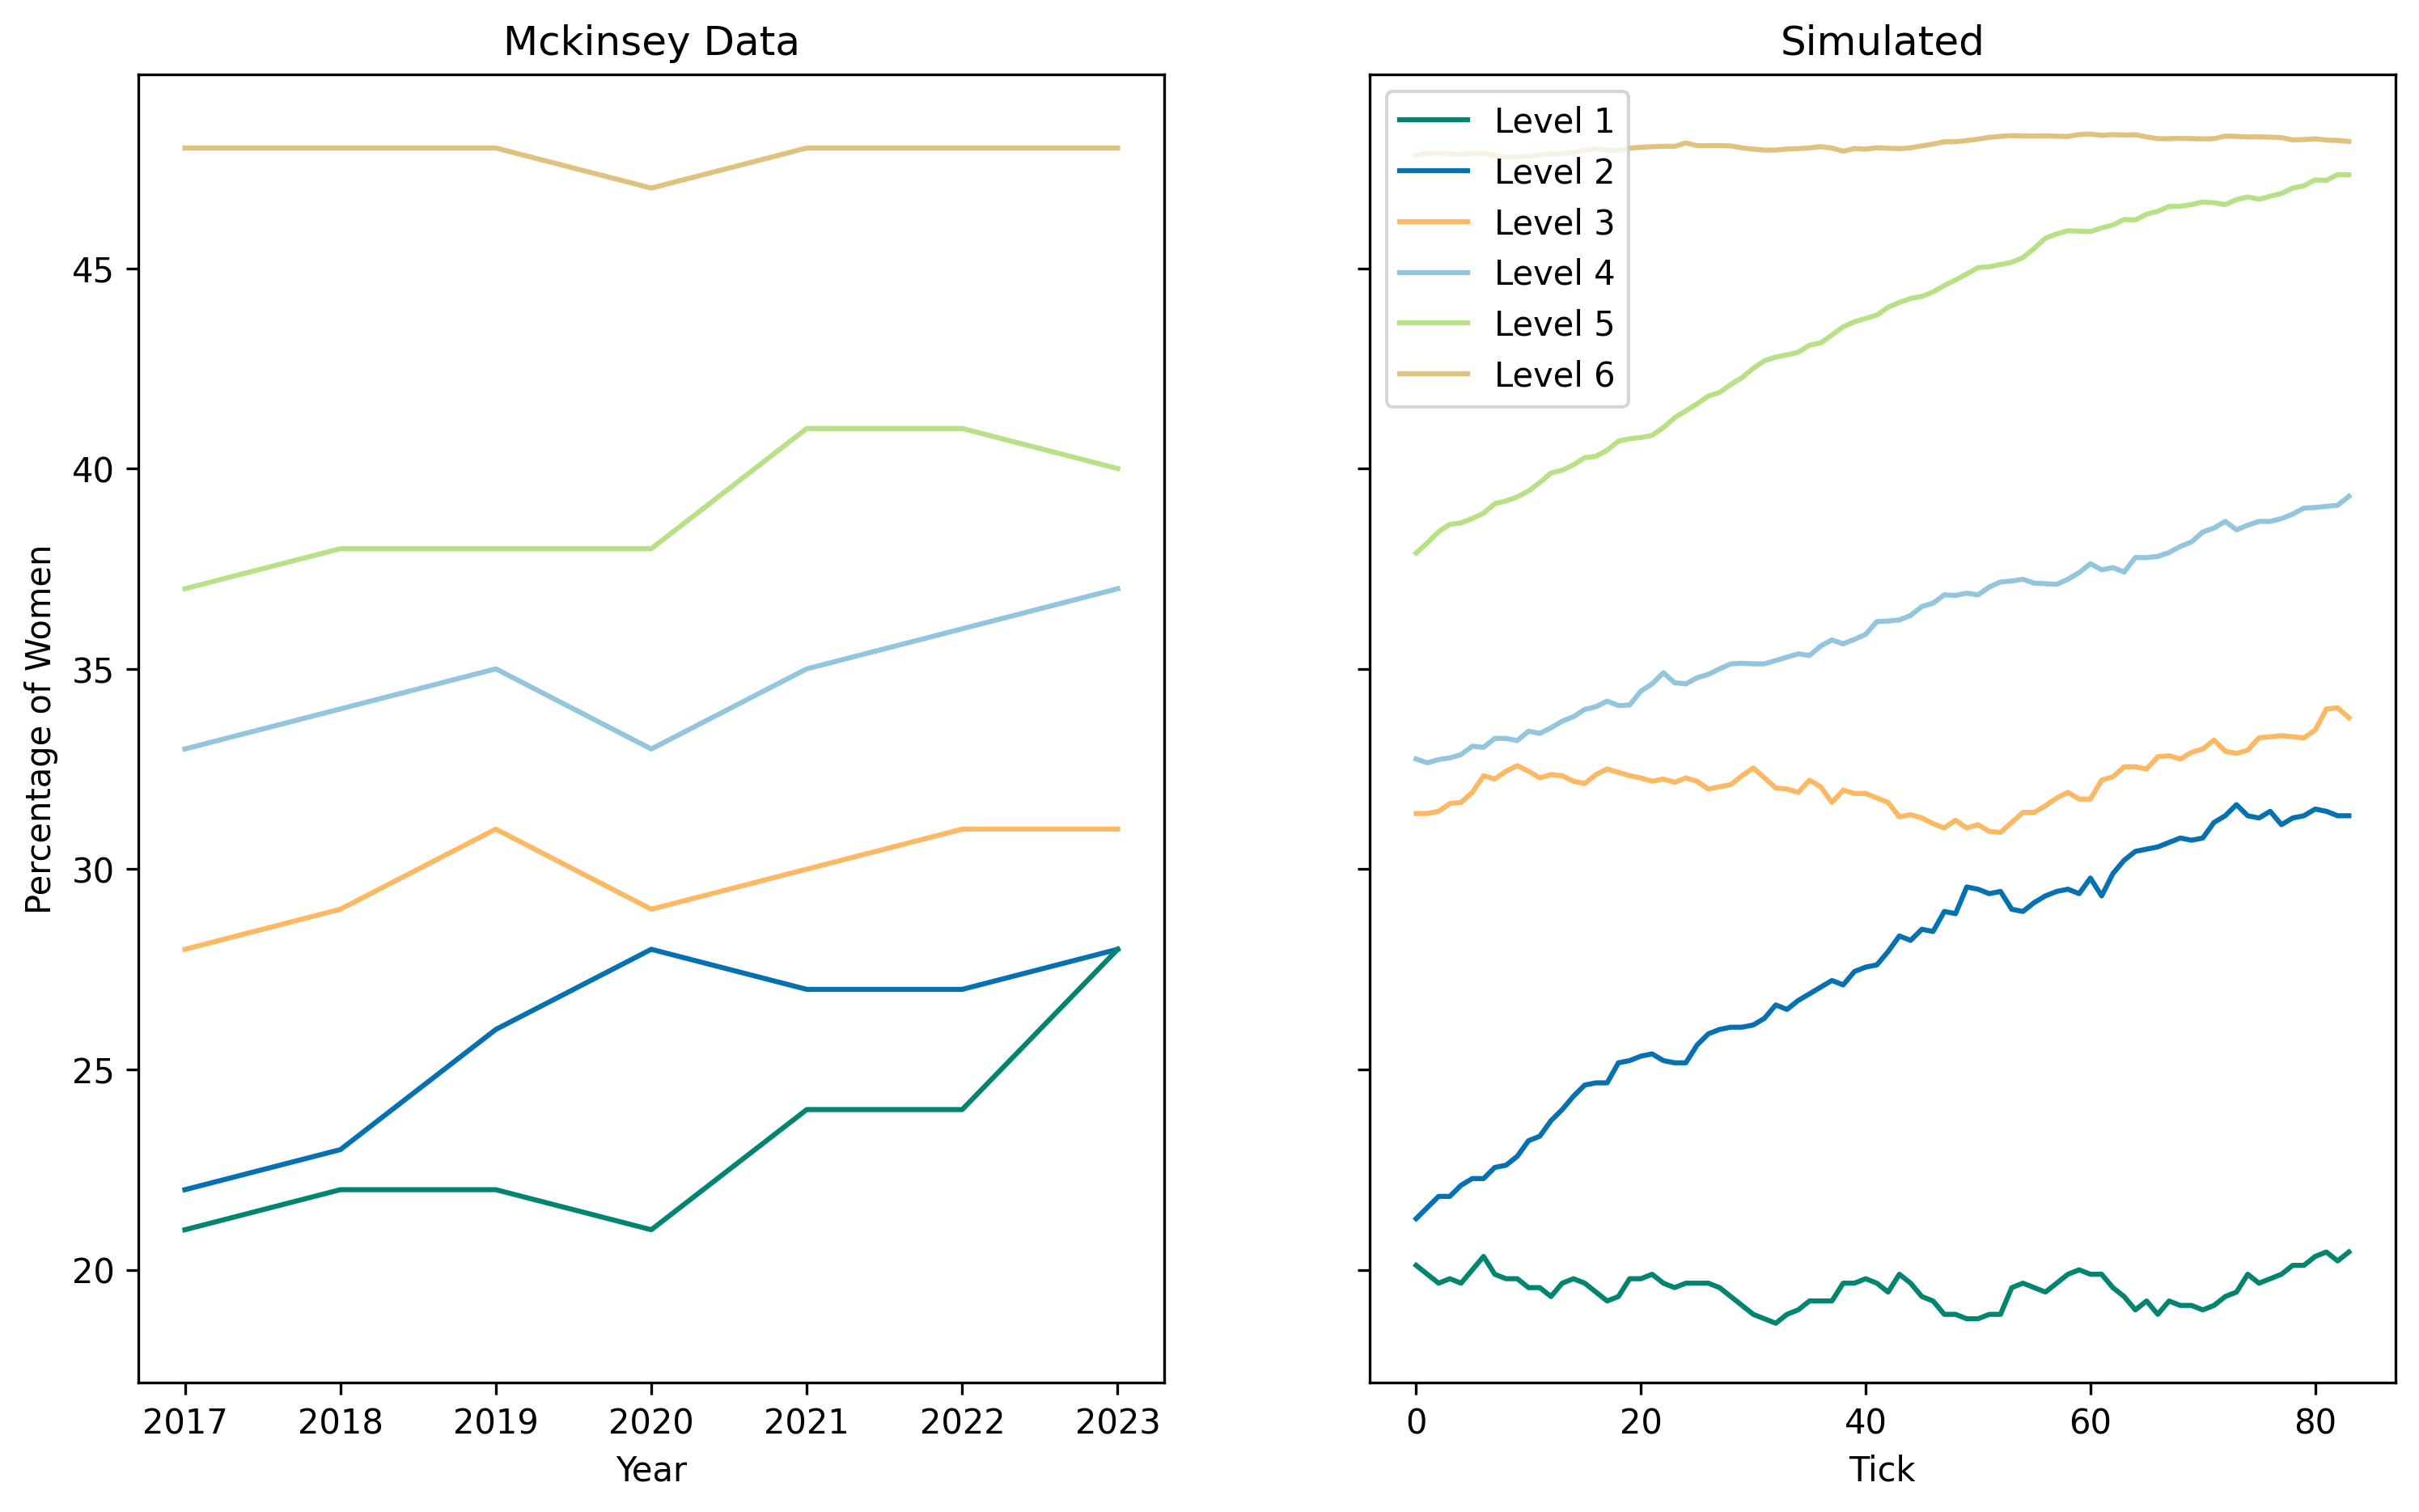

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (12, 7), dpi = 300, sharey = True)
colors ={'Level 1': '#018571', 'Level 2': '#0571B0','Level 3': '#FDB863','Level 4': '#92C5DE','Level 5': '#B8E186', 'Level 6':'#DFC27D'}
# Mckinsey data
for i in range(len(plot_data.columns)):
    ax[0].plot(plot_data.index, plot_data.iloc[:, i], label=plot_data.columns[i], color = colors[plot_data.columns[i]])
ax[0].set_title('Mckinsey Data')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Percentage of Women')

# Simulated
for ind, i in enumerate(np.unique(vali_plot['position'])):
    ax[1].plot(vali_plot[vali_plot['position']==i].tick, vali_plot[vali_plot['position']==i].percent_wom, color = colors[i], label=i)
ax[1].set_title('Simulated')
ax[1].set_xlabel('Tick')
plt.legend()
plt.savefig('plots/percent_women_combined_emma_laura.png')

In [35]:
quota_plot = []

for i in np.unique(quota['tick']):
    for j in np.unique(quota['position']):
        dat = quota[(quota['tick'] == i) & (quota['position'] == j)]
        num_women = dat[dat['gender'] == 'female'].shape[0]
        num_agents =dat.shape[0]
        percent_women = num_women/num_agents * 100

        quot = {'percent_wom': percent_women, 'tick': i, 'position': j}
        quota_plot.append(quot)

In [30]:
parental_plot = []

for i in np.unique(parental['tick']):
    for j in np.unique(parental['position']):
        dat = parental[(parental['tick'] == i) & (parental['position'] == j)]
        num_women = dat[dat['gender'] == 'female'].shape[0]
        num_agents =dat.shape[0]
        percent_women = num_women/num_agents * 100

        par = {'percent_wom': percent_women, 'tick': i, 'position': j}
        parental_plot.append(par)


In [13]:

blinding_plot = []

for i in np.unique(blinding['tick']):
    for j in np.unique(blinding['position']):
        dat = blinding[(blinding['tick'] == i) & (blinding['position'] == j)]
        num_women = dat[dat['gender'] == 'female'].shape[0]
        num_agents = dat.shape[0]
        percent_women = num_women/num_agents * 100

        blind = {'percent_wom': percent_women, 'tick': i, 'position': j}
        blinding_plot.append(blind)

In [12]:
no_int_plot = []

for i in np.unique(nointervention['tick']):
    for j in np.unique(nointervention['position']):
        dat = nointervention[(nointervention['tick'] == i) & (nointervention['position'] == j)]
        num_women = dat[dat['gender'] == 'female'].shape[0]
        num_agents = dat.shape[0]
        percent_women = num_women/num_agents * 100

        no_int = {'percent_wom': percent_women, 'tick': i, 'position': j}
        no_int_plot.append(no_int)

In [38]:

parental_plot = pd.DataFrame(parental_plot)
quota_plot = pd.DataFrame(quota_plot)
blinding_plot = pd.DataFrame(blinding_plot)
no_int_plot = pd.DataFrame(no_int_plot)

parental_plot.to_csv('plots/parental_plot.csv')
quota_plot.to_csv('plots/quota_plot.csv')
blinding_plot.to_csv('plots/blinding_plot.csv')
no_int_plot.to_csv('plots/no_int_plot.csv')

In [39]:
vali_plot.to_csv('plots/vali_plot.csv')

/tmp/ipykernel_18986/307832282.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


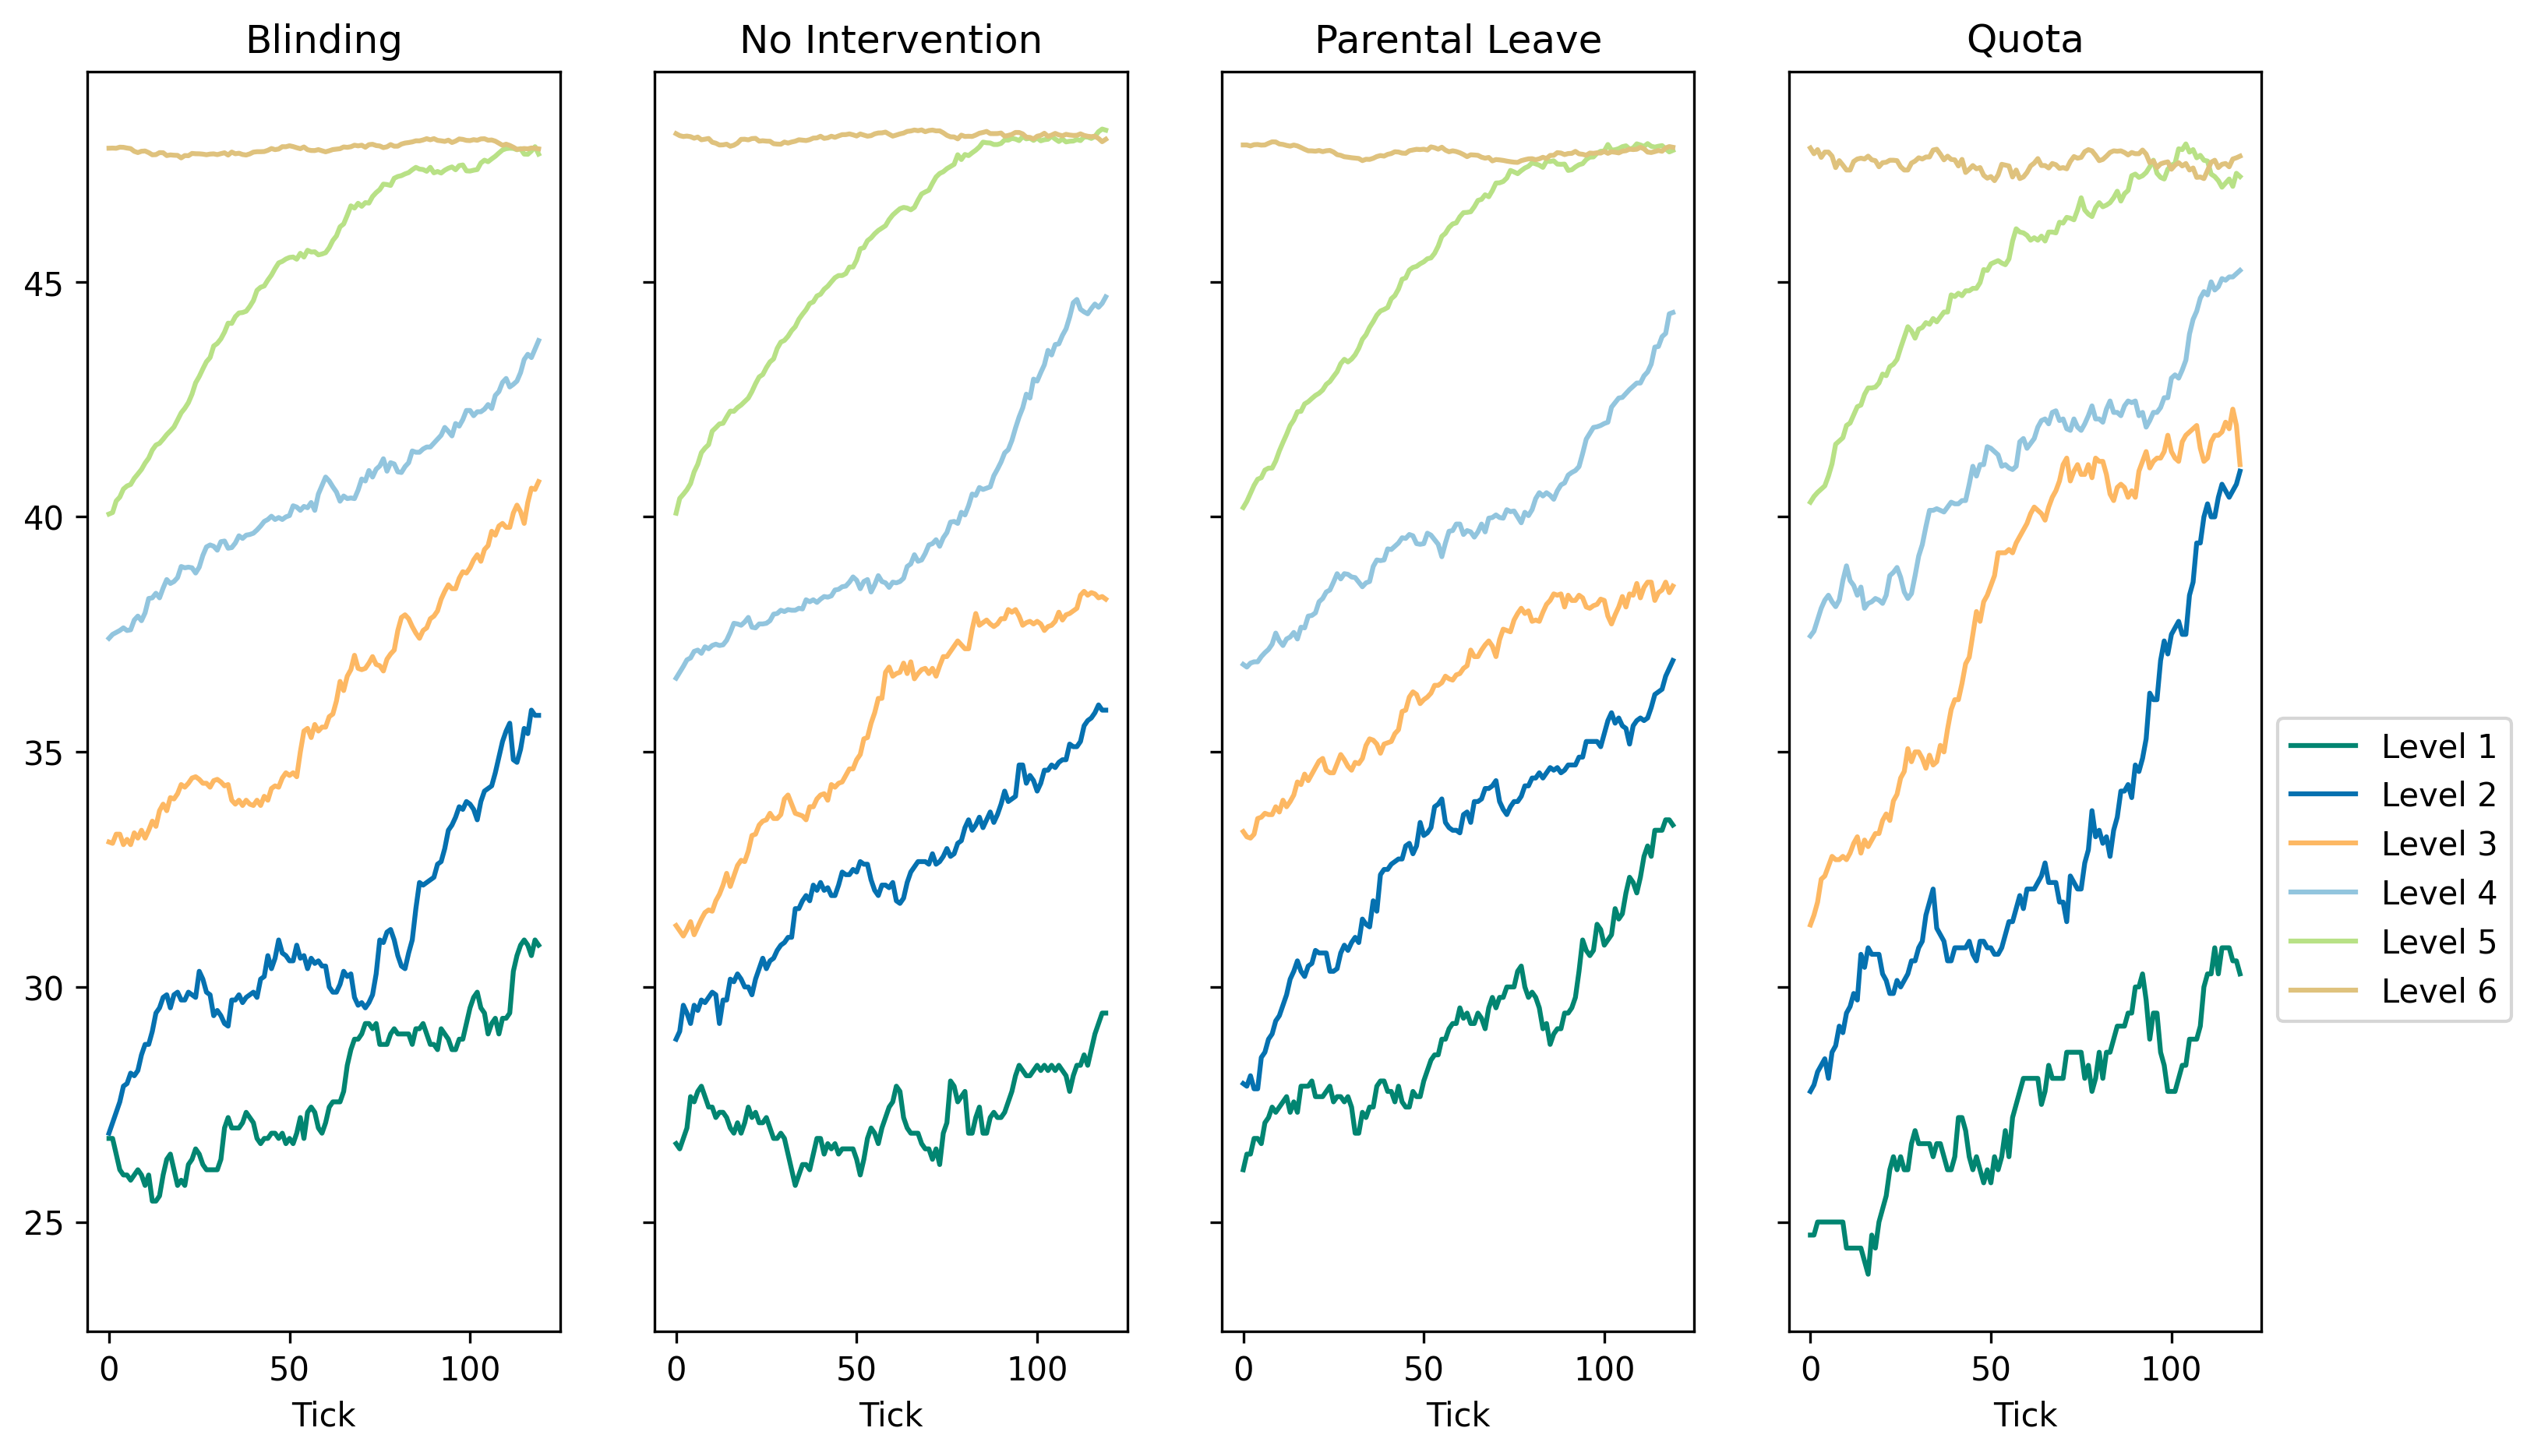

In [40]:
fig, ax = plt.subplots(1, 4, figsize = (12, 7), dpi = 300, sharey = True)
colors ={'Level 1': '#018571', 'Level 2': '#0571B0','Level 3': '#FDB863','Level 4': '#92C5DE','Level 5': '#B8E186', 'Level 6':'#DFC27D'}

#Parental leave
for ind, i in enumerate(np.unique(parental_plot['position'])):
    ax[2].plot(parental_plot[parental_plot['position']==i].tick, parental_plot[parental_plot['position']==i].percent_wom, color = colors[i], label=i)
ax[2].set_title('Parental Leave')
ax[2].set_xlabel('Tick')
plt.legend()

# Quota
for ind, i in enumerate(np.unique(quota_plot['position'])):
    ax[3].plot(quota_plot[quota_plot['position']==i].tick, quota_plot[quota_plot['position']==i].percent_wom, color = colors[i], label=i)
ax[3].set_title('Quota')
ax[3].set_xlabel('Tick')
plt.legend()

# Blinding
for ind, i in enumerate(np.unique(blinding_plot['position'])):
    ax[0].plot(blinding_plot[blinding_plot['position']==i].tick, blinding_plot[blinding_plot['position']==i].percent_wom, color = colors[i], label=i)
ax[0].set_title('Blinding')
ax[0].set_xlabel('Tick')
plt.legend()

# No Intervention
for ind, i in enumerate(np.unique(no_int_plot['position'])):
    ax[1].plot(no_int_plot[no_int_plot['position']==i].tick, no_int_plot[no_int_plot['position']==i].percent_wom, color = colors[i], label=i)
ax[1].set_title('No Intervention')
ax[1].set_xlabel('Tick')
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

plt.savefig('plots/percent_women_combined_emma_laura.png')